In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer(
    "sentence-transformers/all-MiniLM-L6-v2", device="cpu"
)

loaded_model = BERTopic.load(
    "./saved/BERTopic_tesla_sr", embedding_model=embedding_model
)

/Users/dinyad/anaconda3/envs/bertopic-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
loaded_model.get_topic_info()

Topic  Count                                               Name  \
0       -1   9578                         -1_solar_years_would_power   
1        0   1552                      0_heat_pump_heat pump_heating   
2        1   1283                                  1_kwh_use_day_per   
3        2    581                           2_solar_bill_system_cost   
4        3    477                           3_grid_company_back_sell   
..     ...    ...                                                ...   
108    107     33                    107_car_cars_solar panels_solar   
109    108     33      108_solar_solar future_argument_argument make   
110    109     30    109_square_square footage_footage_footage house   
111    110     30  110_brownlee_marques brownlee_brown_markass br...   
112    111     30              111_comment_comments_likes_commenting   

                                        Representation  Representative_Docs  
0    [solar, years, would, power, grid, batteries, ...                  NaN  
1    [heat, pump, heat pump, heating, gas, ac, air,...                  NaN  
2    [kwh, use, day, per, month, year, usage, consu...                  NaN  
3    [solar, bill, system, cost, years, panels, sol...                  NaN  
4    [grid, company, back, sell, back grid, credits...                  NaN  
..                                                 ...                  ...  
108  [car, cars, solar panels, solar, car solar, pa...                  NaN  
109  [solar, solar future, argument, argument make,...                  NaN  
110  [square, square footage, footage, footage hous...                  NaN  
111  [brownlee, marques brownlee, brown, markass br...                  NaN  
112  [comment, comments, likes, commenting, algorit...                  NaN  

[113 rows x 5 columns]

In [ ]:
import json

topic_info = loaded_model.get_topic_info()

topics = []
for _, row in topic_info.iterrows():
    if row["Topic"] == -1:
        continue

    topic = {"topic_label": row["Name"], "keywords": ", ".join(row["Representation"])}
    topics.append(topic)


# Save to a JSON file
output_file = "topics.json"
with open(output_file, "w") as json_file:
    json.dump(topics, json_file, indent=4)

In [13]:
!pip install 'nbformat>=4.2.0'

In [ ]:
loaded_model.visualize_barchart(top_n_topics=32, n_words=8)

In [ ]:
import pandas as pd
import numpy as np

clean_data = "../data/clean_modeling_data.csv"
data = pd.read_csv(clean_data)
docs = data["comment"]

In [6]:
loaded_model.get_document_info(docs)

Document  Topic  \
0      So it appears Tesla found a bug in their app a...     -1   
1      Why didn’t you factor any SREC’s into your cal...     99   
2      Straight from Twitter link after you posted th...     -1   
3      Yes, you cannot produce 350 kWh of energy in a...     22   
4      I may have missed it but don't you sell electr...      3   
...                                                  ...    ...   
25827  OK useful comment now. That was awesome. I can...     -1   
25828                                              First     -1   
25829                                    Your first bro!     -1   
25830                                  Congrats, you win     82   
25831                   You guys need to like my comment     -1   

                                                   Name  \
0                            -1_solar_years_would_power   
1                               99_srecs_srec_nj_jersey   
2                            -1_solar_years_would_power   
3                          22_kwh_day_consumption_solar   
4                              3_grid_company_back_sell   
...                                                 ...   
25827                        -1_solar_years_would_power   
25828                        -1_solar_years_would_power   
25829                        -1_solar_years_would_power   
25830  82_thanks_thanks thanks_thank thanks_thank thank   
25831                        -1_solar_years_would_power   

                                          Representation  Representative_Docs  \
0      [solar, years, would, power, grid, batteries, ...                  NaN   
1      [srecs, srec, nj, jersey, srecs nj, nj get, ne...                  NaN   
2      [solar, years, would, power, grid, batteries, ...                  NaN   
3      [kwh, day, consumption, solar, kw, system, per...                  NaN   
4      [grid, company, back, sell, back grid, credits...                  NaN   
...                                                  ...                  ...   
25827  [solar, years, would, power, grid, batteries, ...                  NaN   
25828  [solar, years, would, power, grid, batteries, ...                  NaN   
25829  [solar, years, would, power, grid, batteries, ...                  NaN   
25830  [thanks, thanks thanks, thank thanks, thank th...                  NaN   
25831  [solar, years, would, power, grid, batteries, ...                  NaN   

                                             Top_n_words  \
0      solar - years - would - power - grid - batteri...   
1      srecs - srec - nj - jersey - srecs nj - nj get...   
2      solar - years - would - power - grid - batteri...   
3      kwh - day - consumption - solar - kw - system ...   
4      grid - company - back - sell - back grid - cre...   
...                                                  ...   
25827  solar - years - would - power - grid - batteri...   
25828  solar - years - would - power - grid - batteri...   
25829  solar - years - would - power - grid - batteri...   
25830  thanks - thanks thanks - thank thanks - thank ...   
25831  solar - years - would - power - grid - batteri...   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
25827                    False  
25828                    False  
25829                    False  
25830                    False  
25831                    False  

[25832 rows x 7 columns]

In [ ]:
docs_infos = loaded_model.get_document_info(docs)

In [ ]:
topic_30_docs = docs_infos[docs_infos["Name"] == "30_may_temperature_spring_summer"][
    "Document"
]
topic_30_docs

66              April showers bring May flowers, after all
371        Also in May your air condition is probably off.
569      I guess they need to change the rhyme to "Apri...
754      I guess spring, also gives more energy since y...
1225     So definitely set your order up to start in th...
                               ...                        
23607    I assume the heat of the summer decreases the ...
23622    Ccone on April showers bring may flowers of co...
23755    Spring makes sense. Solar is most effective wi...
24762    Knew May was your best month. “April showers b...
24798    I works guess March, it always seems really su...
Name: Document, Length: 158, dtype: object

In [ ]:
import json


def write_topic_docs(topic):
    topic_docs = []
    for row in docs_infos[docs_infos["Name"] == topic]["Document"]:

        topic_docs.append({"comment": row})

    # Save to a JSON file
    output_file = f"tmp/{topic}_docs.json"
    with open(output_file, "w") as json_file:
        json.dump(topic_docs, json_file, indent=4)

In [ ]:
write_topic_docs("6_75_account_charge_fee")

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

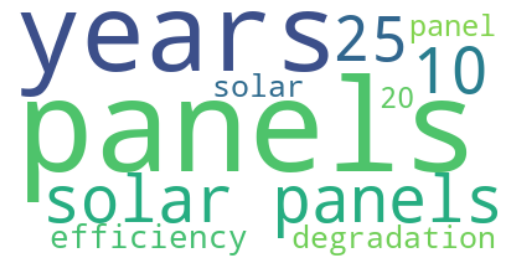

In [7]:
create_wordcloud(loaded_model, topic=31)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.gridspec import GridSpec
import pandas as pd

text = " ".join(docs)

In [ ]:
# --- Step 1: Generate the global word cloud ---

global_wc = WordCloud(
    width=500, height=400, background_color="white", stopwords=None, min_font_size=10
).generate(text)

In [279]:
topics_ids = [0,1,2,3,4,5,6,7,8,9,10,15,16,17,19,22, 25, 27,31]
topic_titles = [
    "Heat pump",
    "Calculation\nof energy usage",
    "Questioning\nthe investment calculations",
    "A negative\nnet usage",
    "Undermining the\n credibility of the Influencer",
    "Net\n metering",
    "Monthly\n electricity fee debate",
    "Influencer\n Appreciation",
    "Thoughts on\n the calculation of the ROI",
    "Solar\n tiles vs panels",
    "Environmental\n Impact",
    "Payback\n period calculation",
    "Battery\n life",
    "Weather\n Impact on Solar Roof",
    "Purchase\n Considerations",
    "Consumption\n calculations",
    "Calculation \nenthusiasts",
    "Solar panels\n are for rich people",
    "Loss of\n efficiency and panels wear"
]
topic_positions_plots = [
    (0, 0),
    (0, 1),
     (1, 0),
    (1, 1),
    (2, 0),
    (2, 1),
    (0, 5),
    (0, 6),

    (1, 5),
    (1, 6),
    
    (2, 5),
    (2, 6),
    (3, 0),
    (3, 1),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 5),
    (3, 6),
]

In [280]:
# --- Step 2: Generate topic-specific wordclouds using your model ---
# Placeholder example; replace `topic_models` with your actual topic model
# For example, `model.get_topic(i)` must return a list of (word, weight) pairs


def create_topic_wordcloud(model, topic):
    word_freqs = dict(model.get_topic(topic))  # Replace with your model method
    wc = WordCloud(background_color="white", max_words=1000)
    return wc.generate_from_frequencies(word_freqs)


# Example: generate wordclouds for topics 0–11 (total 12)
topic_wordclouds = [
    create_topic_wordcloud(loaded_model, i) for i in topics_ids
]  # You must define `model`

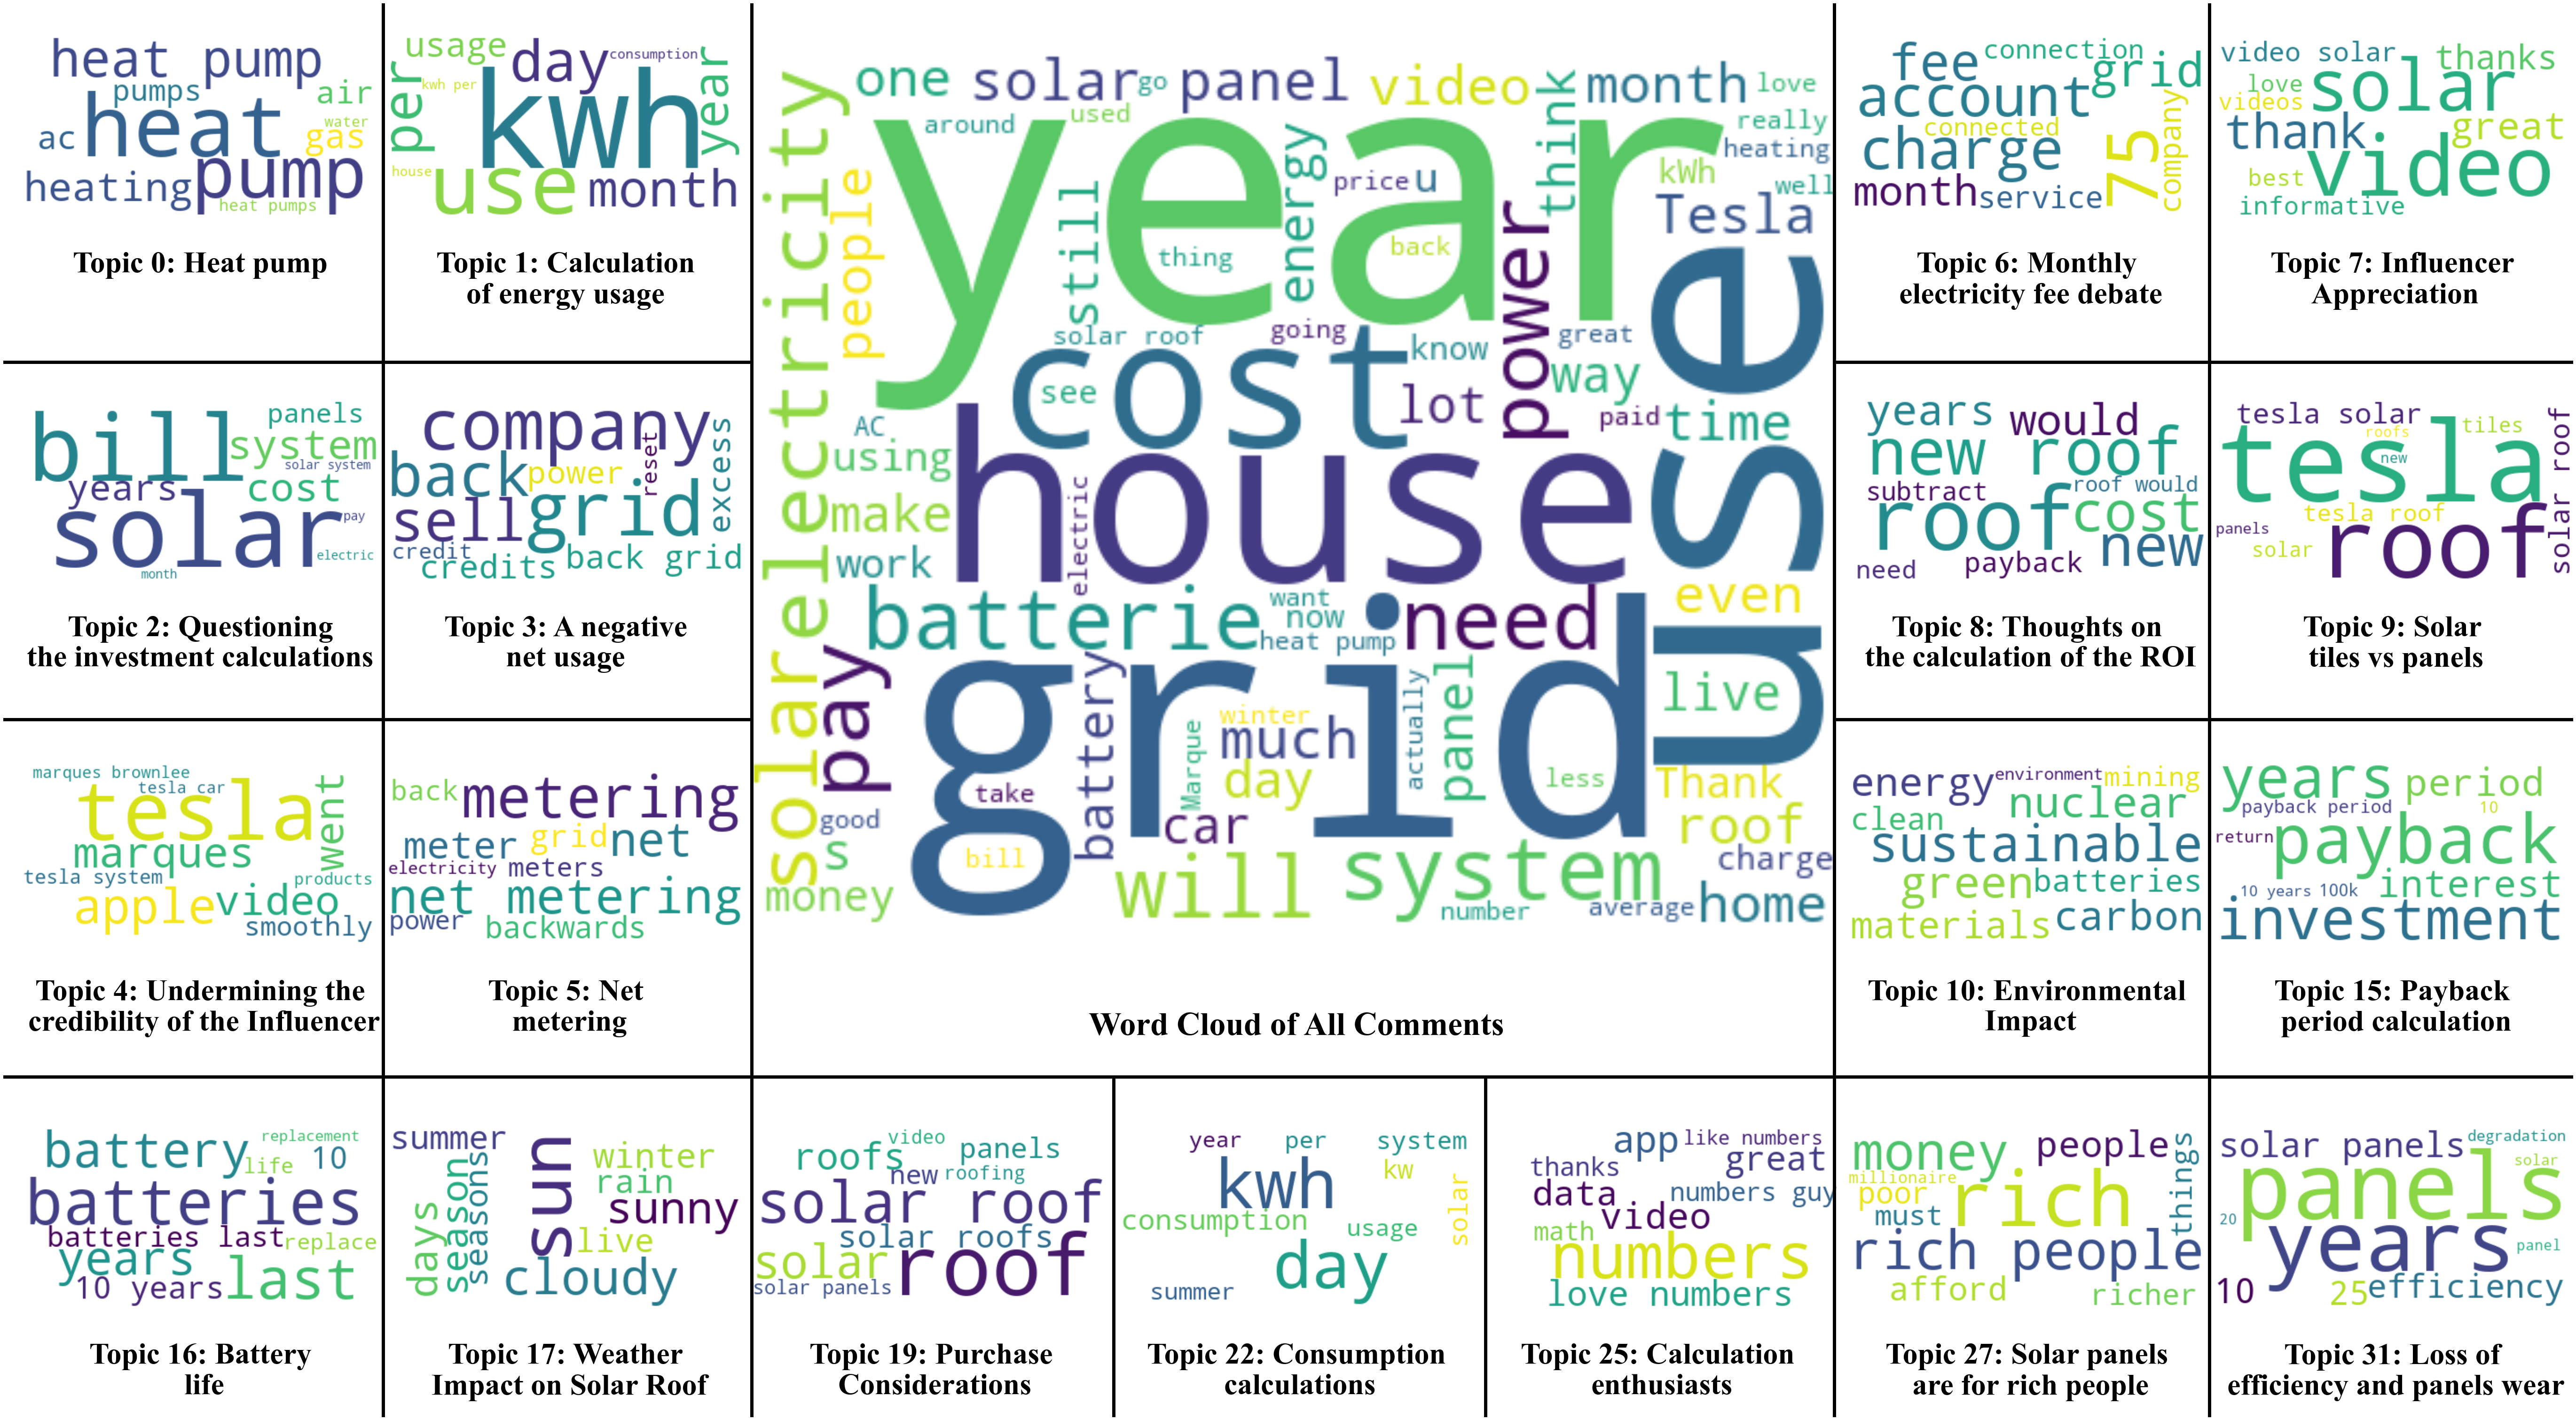

In [282]:
# --- Step 3: Create the figure layout using GridSpec ---
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle


fig = plt.figure(figsize=(70, 40))
gs = GridSpec(4, 7, figure=fig, wspace=0.02, hspace=0.02)

# Add global wordcloud in the center (spanning 2x3 block)
ax_main = fig.add_subplot(gs[0:3, 2:5])
ax_main.imshow(global_wc, interpolation="bilinear")
# ax_main.set_title("Word Cloud of All Comments")
ax_main.text(
    0.5,
    -0.1,
    "Word Cloud of All Comments",
    fontsize=50,
    fontweight="600",
    fontfamily="Times New Roman",
    ha="center",
    va="top",
    transform=ax_main.transAxes,
)
ax_main.axis("off")


# Add topic wordclouds to their positions
for idx, (row, col) in enumerate(topic_positions_plots):
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(topic_wordclouds[idx], interpolation="bilinear")
    # ax.set_title(topic_titles[0], fontsize=8)
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])

    ax.text(
        0.5,
        -0.2,
        f"Topic {topics_ids[idx]}: {topic_titles[idx]}" ,
        fontsize=46,
        fontweight="600",
        fontfamily="Times New Roman",
        ha="center",
        va="top",
        transform=ax.transAxes,
    )


lines = [
    #Verti
    Line2D([0.235], [0.1, 0.85], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.347], [0.1, 0.85], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.457], [0.1, 0.28], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.57], [0.1, 0.28], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.676], [0.1, 0.85], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.79], [0.1, 0.85], transform=fig.transFigure, color="black", linewidth=5),
    #Hori
    Line2D([0.12, 0.347], [0.66], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.12, 0.347], [0.47], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.12, 0.9], [0.28], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.676, 0.9], [0.47], transform=fig.transFigure, color="black", linewidth=5),
    Line2D([0.676, 0.9], [0.66], transform=fig.transFigure, color="black", linewidth=5)
]

for line in lines:
    fig.lines.append(line)


plt.tight_layout()
plt.show()

In [ ]:
dyy = -(0.235 - 0.34)
dyy

0.10500000000000004

In [ ]:
1 / 7

0.14285714285714285

In [ ]:
0.35 + 4 * dyy

0.7700000000000001

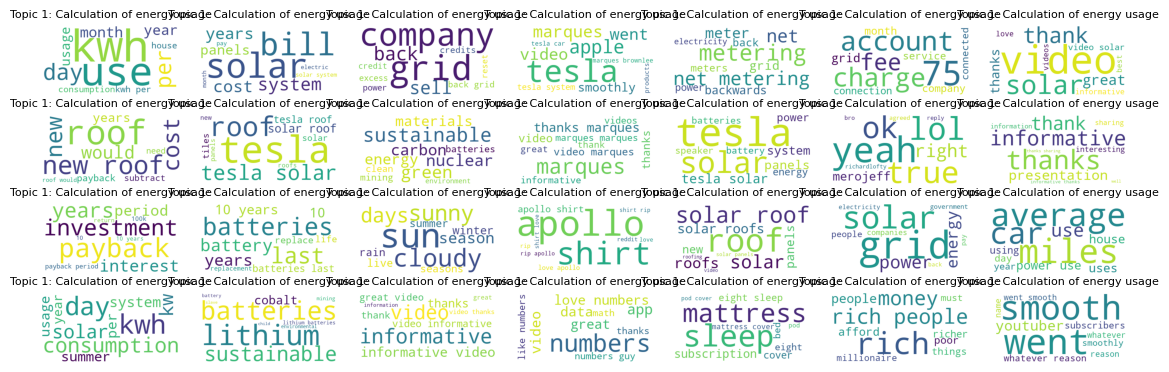

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(14.0, 12.0))
grid = ImageGrid(
    fig,
    111,  # similar to subplot(111)
    nrows_ncols=(4, 7),  # creates 2x2 grid of Axes
    axes_pad=0.2,  # pad between Axes in inch.
)

for ax, im in zip(grid, [topic_wordclouds[i] for i in range(28)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(topic_titles[0], fontsize=8)
    ax.axis("off")

plt.show()